# 비지도학습

In [48]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/NanumBarunGothic.ttf').get_name()
rc('font',family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

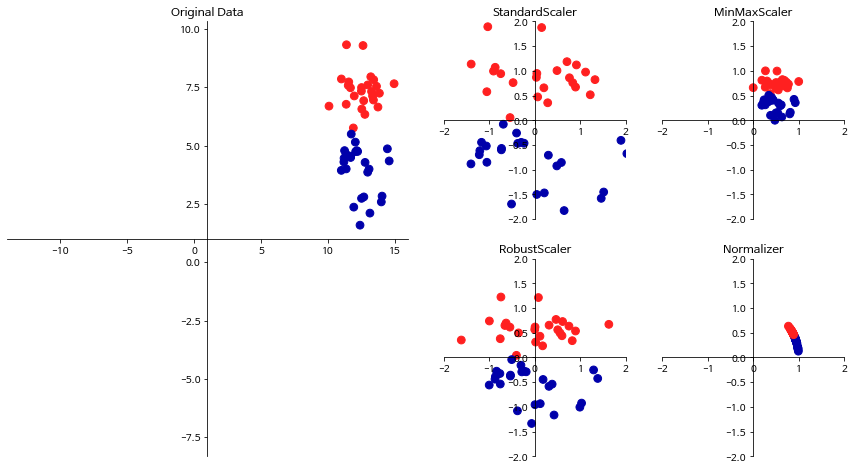

In [49]:
import mglearn
mglearn.plots.plot_scaling()

### 전처리 - 스케일 조정

#### StandardScaler
- Z score 이용하여 x-mean/std / 평균 = 0, 분산 = 1

#### RobustScaler
- 중간값과 사분위값 사용 (x-q2)/(q3-q1) / 이상치에 영향을 덜 받음

#### MinMaxScaler  
- (x-min)/(max-min) / 0~1 사이

#### Normalizer
- 유클리디안거리(L2)가 1. 방향이 중요


### Cancer Data

In [50]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                   random_state=1)

### StandardScaler

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
scaler_scaled = scaler.transform(X_train)

print("StandardScaler()로 변환한 데이터")
print(scaler_scaled)

print("Z-score 계산으로 변환한 데이터")
x_means = X_train.mean(axis=0)
x_std = X_train.std(axis=0)

z_score = (X_train - x_means)/x_std
print(z_score)


print("ScandardScaler != Z-score    :    ", np.sum(scaler_scaled!=z_score))

StandardScaler()로 변환한 데이터
[[ 0.30575375  2.59521918  0.46246107 ...  1.81549702  2.10164609
   3.38609913]
 [ 0.23351721 -0.05334893  0.20573083 ...  0.5143837   0.14721854
   0.05182385]
 [ 0.15572401  0.18345881  0.11343692 ...  0.69446859  0.263409
  -0.10011179]
 ...
 [ 0.85586279  1.19276558  0.89773369 ...  1.12967374  0.75591781
   2.97065009]
 [-0.02486734  0.44095848 -0.08606303 ... -0.52515632 -1.1291423
  -0.45561747]
 [-0.30270019 -0.20968802 -0.37543871 ... -0.967865   -1.54361274
  -1.31500348]]
Z-score 계산으로 변환한 데이터
[[ 0.30575375  2.59521918  0.46246107 ...  1.81549702  2.10164609
   3.38609913]
 [ 0.23351721 -0.05334893  0.20573083 ...  0.5143837   0.14721854
   0.05182385]
 [ 0.15572401  0.18345881  0.11343692 ...  0.69446859  0.263409
  -0.10011179]
 ...
 [ 0.85586279  1.19276558  0.89773369 ...  1.12967374  0.75591781
   2.97065009]
 [-0.02486734  0.44095848 -0.08606303 ... -0.52515632 -1.1291423
  -0.45561747]
 [-0.30270019 -0.20968802 -0.37543871 ... -0.967865   -1.

직접 z score 변환한 것과 라이브러리와의 결과를 비교함.

당연히 같은 결과...

### MinMaxScaler
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)


print("스케일 조정 전 특성별 최소값 = ")
print(X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값 = ")
print(X_train.max(axis=0))

X_train_scaled = scaler.transform(X_train)
print("스케일 조정 후 특성별 최소값 = ")
print(X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값 = ")
print(X_train_scaled.max(axis=0))

스케일 조정 전 특성별 최소값 = 
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값 = 
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값 = 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값 = 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [53]:
# 테스트 세트

X_test_scaled = scaler.transform(X_test)
print("스케일 조정 후 특성별 최소값 = ")
print(X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값 = ")
print(X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값 = 
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값 = 
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


test데이터는 0과 1로 맞춰지지 않음!

훈련 데이터를 사용하여 만든 min max기 때문에

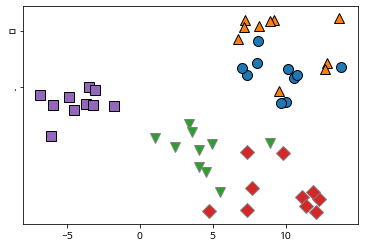

In [54]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 50, centers=5, cluster_std=2, random_state=4)

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.yticks((0,5), [",", 'ㅁ'])

#cluster_std = 클러스터의 표준편차 default = 1

X_train, X_test, y_train, y_test = train_test_split(X, y ,
                                                   random_state=5, test_size=.1)


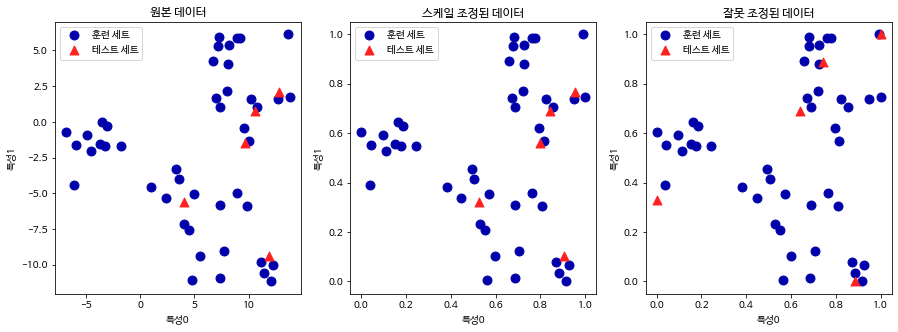

In [8]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

#원본 데이터
axes[0].set_title("원본 데이터")
axes[0].set_xlabel("특성0")
axes[0].set_ylabel("특성1")
axes[0].scatter(X_train[:,0], X_train[:,1], color=mglearn.cm3(0), label="훈련 세트", s=80)
axes[0].scatter(X_test[:,0], X_test[:,1], marker='^', color=mglearn.cm3(1), label="테스트 세트", s=80)
axes[0].legend()

#스케일 조정된 데이터
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].set_title("스케일 조정된 데이터")
axes[1].set_xlabel("특성0")
axes[1].set_ylabel("특성1")
axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1], color=mglearn.cm3(0), label="훈련 세트", s=80)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], marker='^', color=mglearn.cm3(1), label="테스트 세트", s=80)
axes[1].legend()

#잘못 조정된 데이터 - 훈련, 테스트 세트에 각각 스케일러 적용

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

axes[2].set_title("잘못 조정된 데이터")
axes[2].set_xlabel("특성0")
axes[2].set_ylabel("특성1")
axes[2].scatter(X_train_scaled[:,0], X_train_scaled[:,1], color=mglearn.cm3(0), label="훈련 세트", s=80)
axes[2].scatter(X_test_scaled[:,0], X_test_scaled[:,1], marker='^', color=mglearn.cm3(1), label="테스트 세트", s=80)
axes[2].legend()





잘못 조정된 데이터의 경우
- 각각을 스케일러에 조정해서 적용하니 잘못된 결과가 나옴
- 먼저 훈련, 테스트 데이터를 나눈 후 훈련 데이터로 만든 스케일러를 사용해야함

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import sklearn.preprocessing as preps #전처리 스케일러들


cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                   random_state=0)

#오리지널
svm = SVC(gamma='auto').fit(X_train, y_train)
print("스케일 전 SVC = {:.2f}".format(accuracy_score(y_test, svm.predict(X_test))))

# MinMax
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print("MinMax SVC = {:.2f}".format(accuracy_score(y_test, svm.predict(X_test_scaled))))

# StandardScaler
scaler = preps.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print("StandardScaler SVC = {:.2f}".format(accuracy_score(y_test, svm.predict(X_test_scaled))))

#RobustScaler
scaler = preps.RobustScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print("RobustScaler SVC = {:.2f}".format(accuracy_score(y_test, svm.predict(X_test_scaled))))


# Normalizer
scaler = preps.Normalizer().fit(X_train)
X_train_scaled = scaler.transform(X_train)
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print("Normalizer SVC = {:.2f}".format(accuracy_score(y_test, svm.predict(X_test_scaled))))

#다른 스케일러들...


스케일 전 SVC = 0.63
MinMax SVC = 0.95
StandardScaler SVC = 0.97
RobustScaler SVC = 0.97
Normalizer SVC = 0.63


cancer data 특성들의 값의 범위 조정
- 만약 이상치가 있다면 거기에 의존적이 될 수 있음
- 조정 후 결과가 좋아짐

## PCA 주성분분석

- 상관관계가 없는 특성으로 데이터셋 변환 후 일부 특성을 선택
- 고차원에서 분산 유지하면서 차원 줄임 NV = λV


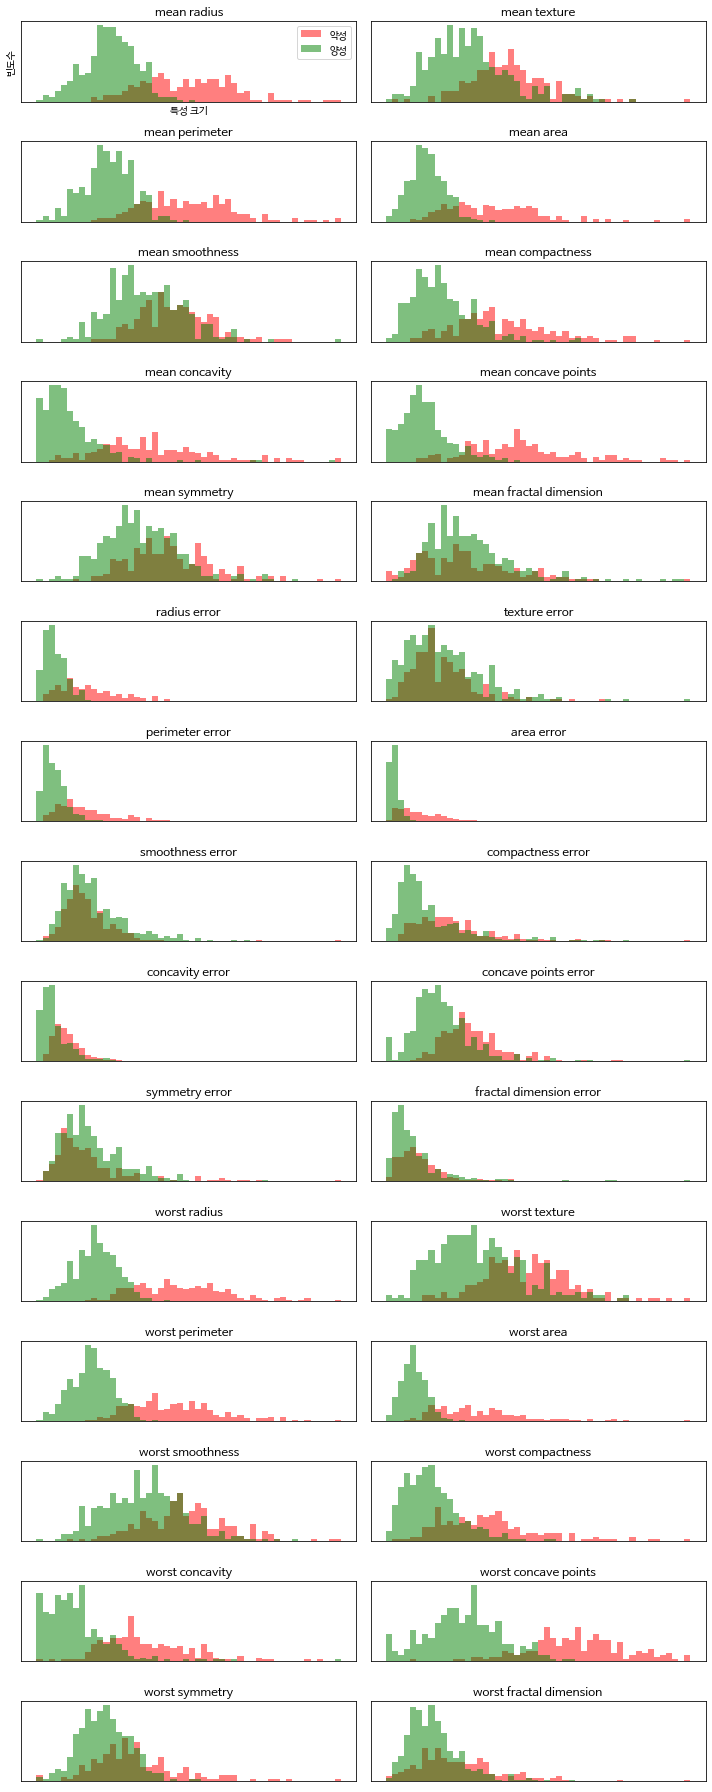

In [56]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                   random_state=1)


fig, axes = plt.subplots(15,2,figsize=(10, 25))
class0 = cancer.data[cancer.target==0] # maligant
class1 = cancer.data[cancer.target==1] # benign

ax = axes.ravel()

for i in range(cancer.data.shape[1]): #각 특성마다
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(class0[:,i], bins=bins, color='red', alpha=.5, label="악성")
    ax[i].hist(class1[:,i], bins=bins, color='green', alpha=.5, label="양성")
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    ax[i].set_xticks(())
    
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도수")
ax[0].legend()
fig.tight_layout()

#### 각 특성에 따른 클래스 빈도수


원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


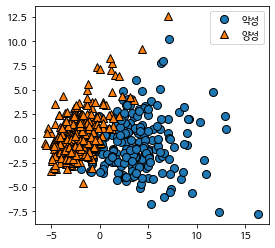

In [57]:
scaler = StandardScaler().fit(cancer.data)

# 훈련, 테스트 데이터 세트 스케일링 - Z-score 이용.
X_scaled = scaler.transform(cancer.data)

from sklearn.decomposition import PCA

# 주성분 두 개만 유지
# 0~1 사이 값을 주면 eigen value로 확률 값으로 사용함
pca = PCA(n_components=2) 


pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)

print("원본 데이터 형태 : {}".format(X_scaled.shape))
print("축소된 데이터 형태 : {}".format(x_pca.shape))

mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], cancer.target, s=8)
plt.legend(["악성", "양성"])
plt.gca().set_aspect('equal')
# x축 y축 비율

PCA로 만든 주성분 2개에 따른 분류

- 꽤 잘 구분됨
- 악성이 좀 더 퍼져있는듯한 형태

Text(0, 0.5, '주성분')

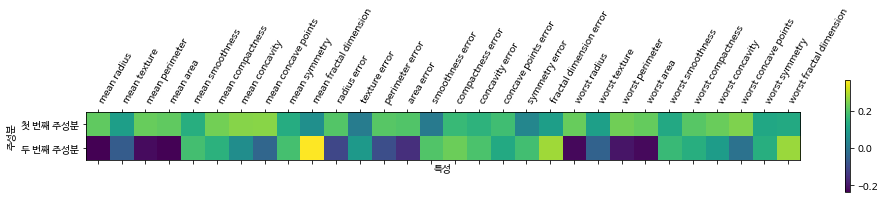

In [58]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1],['첫 번째 주성분','두 번째 주성분'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names,rotation=60, ha='left')
plt.xlabel('특성')
plt.ylabel('주성분')


히트맵으로 표현한 주성분

- 첫 번째 주성분은 특성들끼리 유사함.. 값이 상승하면 다 같이 상승할 것임..
- 두 번째 주성분은 특성 사이의 차이가 심하다 의미 파악이 어렵다

In [22]:
# 0.5
pca = PCA(n_components=0.9) 
pca.fit(X_scaled)
x_pca = pca.transform(x_scaled)

print("원본 데이터 형태 : {}".format(X_scaled.shape))
print("축소된 데이터 형태 : {}".format(x_pca.shape))


원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 7)


n_components = 0.9

([<matplotlib.axis.YTick at 0x25379622df0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

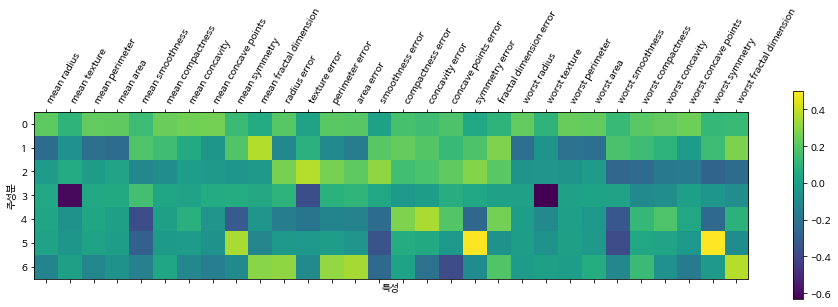

In [23]:
plt.matshow(pca.components_, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names,rotation=60, ha='left')
plt.xlabel('특성')
plt.ylabel('주성분')
plt.yticks(range(len(pca.components_)))

pca를 히트맵으로 표현

- 0번은 서로 상호관계
- 다른 것들은 조금씩 차이가 있고 3,5는 좀 더 그 정도가 심하다

## 고유 얼굴 특성 추출

In [59]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=.7)
image_shape = people.images[0].shape
print(image_shape)

print(people.keys())
print(people.images.shape)
print(people.data.shape)
print(len(people.target_names))

(87, 65)
dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
(3023, 87, 65)
(3023, 5655)
62


### fetch_lfw_people data

- 클래스는 62개
- 샘플은 3023장. 
- 이미지의 사이즈는 87*65

In [60]:
X_train, X_test, y_train, y_test = train_test_split(people.data,
                                                    people.target, 
                                                    stratify=people.target,
                                                    random_state=0)

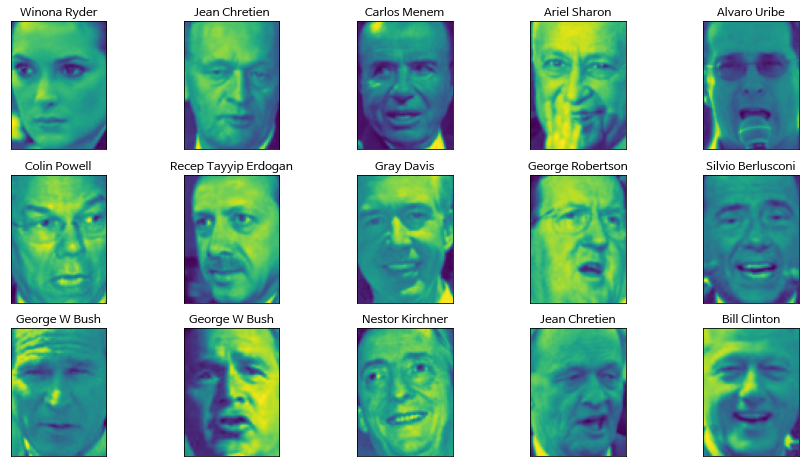

In [61]:
fig, axes = plt.subplots(3, 5 ,figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})
# subplot keyword설정

for t, i, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(i)
    ax.set_title(people.target_names[t])

In [27]:
bins = np.bincount(people.target)

for i in range(len(people.target_names)):
    print('{:25} {:3}'.format(people.target_names[i], bins[i]), end= ' ')
    if i%4==3:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 Andre Agassi               36 
Angelina Jolie             20 Ariel Sharon               77 Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 
Bill Clinton               29 Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 Gerhard Schroeder         109 
Gloria Macapagal Arroyo    44 Gray Davis                 26 Guillermo Coria            30 Hamid Karzai               22 
Hans Blix                  39 Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 Jennifer Capriati          42 
Jennifer Lopez             21 Jeremy Greenstock          24 Jiang Zemin                20 John Ashcroft              53 
John Negroponte            31 Jo

클래스별 빈도수

- 최저로 설정한 20장만 가진 클래스가 있는 반면 22번 bush는 530장이나 가지고 있음..
- 데이터 편중을 해소하기 위하여 아래 코드로 클래스별  최대 50장씩으로만 선택

In [62]:
mask = np.zeros(people.target.shape, dtype=np.bool)

for t in np.unique(people.target):
    mask[np.where(people.target==t)[0][:50]] =1
#np.where로 찾으면 arr [0] 에 그 결과가 들어옴
#거기서 50개까지를 선택
    
x_people = people.data[mask]
y_people = people.target[mask]

x_people = x_people/ 255.
#0~255 픽셀값을 0~1로 조정함.


In [29]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(x_people,
                                                    y_people, 
                                                    stratify=y_people, 
                                                    random_state=0)

knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

print("knn test score = ", knn.score(X_test, y_test))

knn test score =  0.23255813953488372


바로  knn 최근접 모델로 분류한 결과  0.23

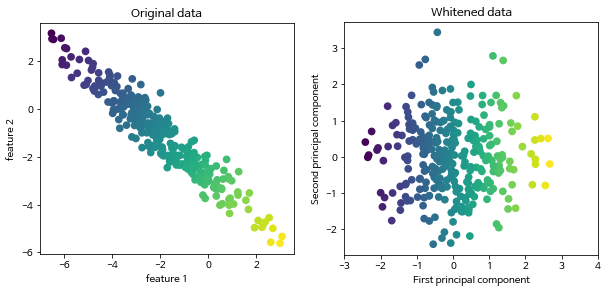

In [37]:
mglearn.plots.plot_pca_whitening()

In [38]:
#PCA적용

#whiten >> 주성분 스케일이 같아지는 효과!
pca = PCA(n_components=100,whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape : ", X_train_pca.shape)
print("X_test_pca.shape : ", X_test_pca.shape)

knn.fit(X_train_pca, y_train)
print("whiten = True, knn test score = ", knn.score(X_test_pca, y_test))

pca_none = PCA(n_components=100,whiten=False, random_state=0).fit(X_train)
X_train_pca = pca_none.transform(X_train)
X_test_pca = pca_none.transform(X_test)
knn.fit(X_train_pca, y_train)
print("whiten = False, knn test score = ", knn.score(X_test_pca, y_test))

X_train_pca.shape :  (1547, 100)
X_test_pca.shape :  (516, 100)
whiten = True, knn test score =  0.312015503875969
whiten = False, knn test score =  0.23837209302325582


### KNN
- pca로 주성분 100개, whiten 설정 후 결과
- 처리 전보다 정확도가 올라감
- 설정하지 않으면 스케일되지 않은 데이터기 때문에 pca사용 전과 비슷함

In [39]:
pca.components_.shape

(100, 5655)

- 총 100개를 추출했기 때문에 100
- 사진의 사이즈가 87*65기 때문에 5655

In [63]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(x_people,
                                                    y_people, 
                                                    stratify=y_people, 
                                                    random_state=0)


nb = GaussianNB().fit(X_train, y_train)
print("nb test score = {:.3f}".format(nb.score(X_test, y_test)))

scaler = StandardScaler().fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=100,whiten=False, random_state=0).fit(x_train_scaled)
X_train_pca = pca.transform(x_train_scaled)
X_test_pca = pca.transform(x_test_scaled)

nb.fit(X_train_pca, y_train)
print("scaler사용, nb test score = {:.3f}".format(nb.score(X_test_pca, y_test)))

pca = PCA(n_components=100,whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

nb.fit(X_train_pca, y_train)
print("whiten 사용, nb test score = {:.3f}".format(nb.score(X_test_pca, y_test)))

nb test score = 0.242
scaler사용, nb test score = 0.426
whiten 사용, nb test score = 0.421


### Gaussian Naive Bayes

- pca 전은 knn과 비슷
- pca 후는 조금 더 성능이 좋음
- 스케일러와 whiten은 비슷하다

In [64]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(x_people,
                                                    y_people, 
                                                    stratify=y_people, 
                                                    random_state=0)


lr = LogisticRegression(multi_class='multinomial', max_iter=3000).fit(X_train, y_train)
print("nb test score = ", lr.score(X_test, y_test))

scaler = StandardScaler().fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=100,whiten=False, random_state=0).fit(x_train_scaled)
X_train_pca = pca.transform(x_train_scaled)
X_test_pca = pca.transform(x_test_scaled)

lr.fit(X_train_pca, y_train)
print("scaler사용, nb test score = ", nb.score(X_test_pca, y_test))

pca = PCA(n_components=100,whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

lr.fit(X_train_pca, y_train)
print("whiten 사용, nb test score = ", nb.score(X_test_pca, y_test))

nb test score =  0.5348837209302325
scaler사용, nb test score =  0.02131782945736434
whiten 사용, nb test score =  0.42054263565891475


### Logistic_regression

- multinomial로 설정해서 실행해봤는데 전체를 다 따지면서 해서 그런지 비교적 정확도가 매우 높다
- scaler 사용 후는 오히려 떨어지고 whiten은 다른 모델들과 비슷하다..


- 단점은 연산 시간이 확실히 가우시안보다 너무 많이 걸린다 ....

In [65]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_estimators=100, random_state=0)
clf2 = GaussianNB()
clf3 = KNeighborsClassifier(n_neighbors=1)

vc = VotingClassifier(estimators=[('rf',clf1),('nb',clf2),('knn',clf3)])
vc.fit(X_train, y_train)

print("voting classifier test score = ", vc.score(X_test, y_test))

pca = PCA(n_components=100,whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

lr.fit(X_train_pca, y_train)
print("whiten 사용, nb test score = ", nb.score(X_test_pca, y_test))

voting classifier test score =  0.32558139534883723
whiten 사용, nb test score =  0.42054263565891475


### VotingClassifier

- 랜덤포레스트, 가우시안, knn으로 votingclassifier생성
- pca 전은 다른 모델보다 좀 더 높아짐
- pca 후는 비슷함..

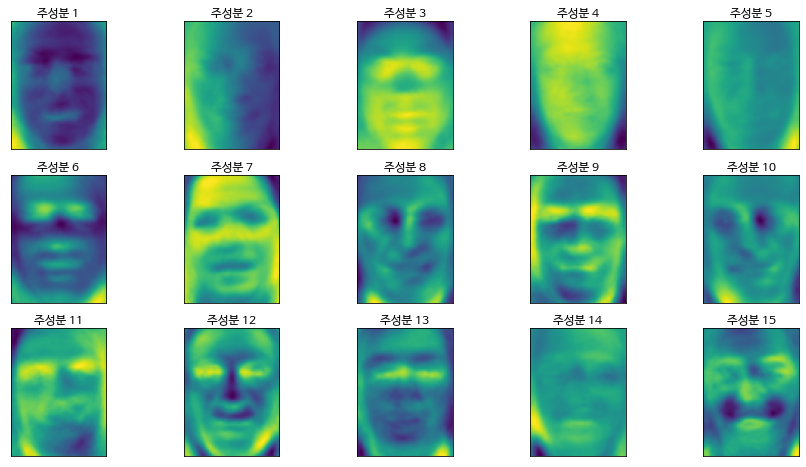

In [104]:
fig, axes = plt.subplots(3,5, figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분 {}".format(i+1))


pca의 주성분을 시각화함 - 컴퓨터가 보는 방식

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 7.0s, 0.1min


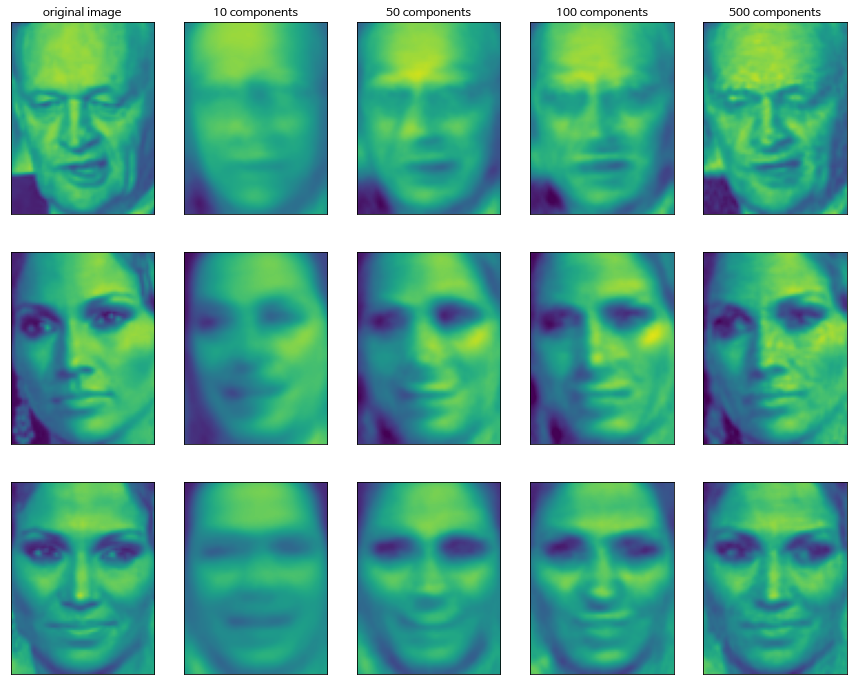

In [105]:
mglearn.plots.plot_pca_faces(X_train,X_test, image_shape)


주성분의 수에 따른 이미지 복원
- 원본 = [1 * 5655]
- 주성분 = [100* 5655] / 주성분' = [5655*100]

- 추출한 새 특성 = [1*5655] [ 5655* 100] = [1*100]
- 복원 = [1*100] * [100* 5655] 


Text(0, 0.5, '두 번째 주성분')

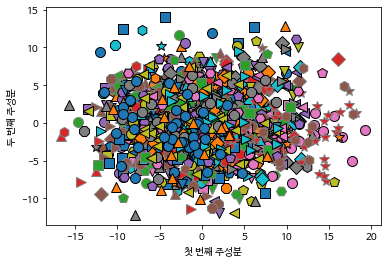

In [106]:
mglearn.discrete_scatter(X_train_pca[:,0],X_train_pca[:,1],y_train)
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")


주성분 두 가지로 클래스 찍기....
- 두 가지로는 구분이 안 감


In [78]:
print(people.target_names[0])
print(np.sum(people.target==0))

index0 = np.where(people.target==0)
datas = people.data[index0]
print(datas.shape)

pca0 = PCA(n_components=10, whiten=True, random_state=0).fit(datas)


Alejandro Toledo
39
(39, 5655)


# NMF(Non negative Matrix Factorization)

- V = WH   W: 변환데이터(가중행렬), H: 성분(특성행렬)
- 주성분과 계수가 0이상
- pca보다 nmf가 해석하기 쉬움

D:\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
D:\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


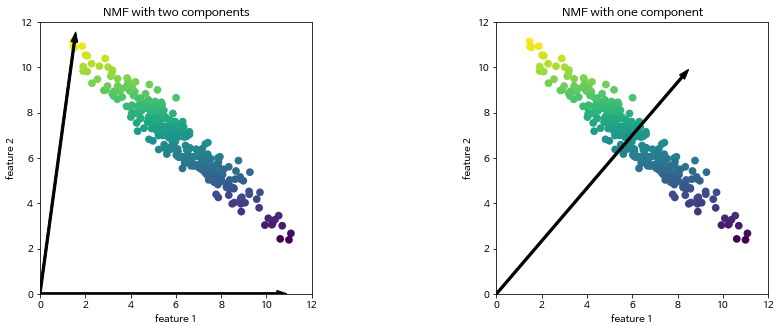

In [42]:
mglearn.plots.plot_nmf_illustration()

데이터에 대해서 특성 두 개, 특성 하나의 벡터로 표현한 그래프

In [66]:
X_train, X_test, y_train, y_test = train_test_split(people.data,
                                                    people.target, 
                                                    stratify=people.target,
                                                    random_state=0)

In [ ]:
comp = [10,50,100,500]

fig, axes = plt.subplots(3,5,figsize=(15,8))

for 

nmf = NMF(n_components=c,  random_state=0,max_iter=1000,tol=1e-2).fit(X_train)

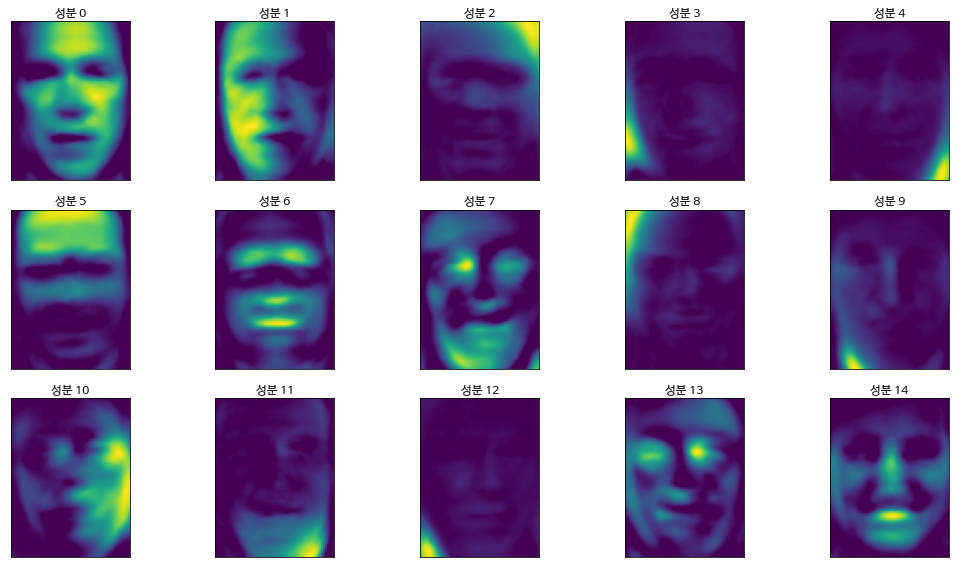

In [71]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=15,  random_state=0,max_iter=1000,tol=1e-2).fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes=plt.subplots(3,5,figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))

fig.tight_layout()

# 매니폴드 (manifold)

- 새로운 평면에 점을 찍어서 유클리디안 거리와 실제 차이가 같도록 하는 새 평면을 찾는 작업

## t-SNE

- t분포 사용(분산이 알려지지 않은 경우 정규분포 대신 사용)
- Vector Visualization목적
- 데이터 간의 관계 구조를 보존하는
- 2개나 3개 정도의 특성을 뽑는다
- 분석용! 훈련 데이터만 사용/ 테스트 데이터 변환 안함

> - 포인트 사이의 유클리디안 거리를 t분포의 확률로 표현
> - 확률이 높으면 가까운 것